In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
data = pd.read_csv("all_data.csv")
data.head()

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,link,distributor
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,997259.0,5271666.0,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,https://www.boxofficemojo.com/title/tt0118589/...,NaN
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,118000000.0,224834564.0,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,https://www.boxofficemojo.com/title/tt0120630/...,NaN
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,178839854.0,333535934.0,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0120667/...,NaN
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,30413474.0,56298474.0,R,2 hr 3 min,Biography,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0120679/...,NaN
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,42955549.0,74558115.0,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,https://www.boxofficemojo.com/title/tt0120681/...,NaN


In [4]:
if 'experience_maps_to_save' not in globals():
    experience_maps_to_save = {}
if 'grouped_imputation_maps_to_save' not in globals():
    grouped_imputation_maps_to_save = {}

In [5]:
data.columns

Index(['movie_id', 'movie_title', 'movie_year', 'director', 'writer',
       'producer', 'composer', 'cinematographer', 'main_actor_1',
       'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'domestic',
       'international', 'worldwide', 'mpaa', 'run_time', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'link', 'distributor'],
      dtype='object')

In [6]:
data['worldwide']

0         5271666.0
1       224834564.0
2       333535934.0
3        56298474.0
4        74558115.0
           ...     
5714     46890297.0
5715    309232797.0
5716     21051915.0
5717     68631669.0
5718     20311536.0
Name: worldwide, Length: 5719, dtype: float64

In [7]:
nan_data = (data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
21,genre_4,64.574226
23,distributor,43.556566
20,genre_3,30.914496
19,genre_2,8.078335
14,international,7.169086
16,mpaa,3.899283
7,cinematographer,3.567057
6,composer,3.112432
13,domestic,0.332226
5,producer,0.314740


In [8]:
data = data.dropna(subset=['worldwide'])

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
test_data.to_csv("test.csv", index=False)

In [10]:
train_movie_title = train_data['movie_title']
columns_to_drop = ['movie_id', 'movie_title', 'link']
#columns_to_drop = ['movie_id', 'link']
train_data = train_data.drop(columns=columns_to_drop)
train_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,distributor
4482,2008,Sanaa Hamri,Elizabeth Chandler,Debra Martin Chase,Rachel Portman,Jim Denault,America Ferrera,Alexis Bledel,Amber Tamblyn,Blake Lively,...,44089964.0,262453.0,44352417.0,PG-13,1 hr 59 min,Comedy,Drama,Romance,NaN,Warner Bros.
4803,2014,R.J. Cutler,Shauna Cross,Alison Greenspan,Heitor Pereira,John de Borman,Chloë Grace Moretz,Mireille Enos,Jamie Blackley,Joshua Leonard,...,50474843.0,27800000.0,78274843.0,PG-13,1 hr 47 min,Drama,Fantasy,Music,Romance,Warner Bros.
4890,2016,Sharon Maguire,Helen Fielding,Tim Bevan,Craig Armstrong,Andrew Dunn,Renée Zellweger,Gemma Jones,Jim Broadbent,Sally Phillips,...,24252420.0,187700000.0,211952420.0,R,2 hr 3 min,Comedy,Drama,Romance,NaN,Universal Pictures
5509,2016,Travis Knight,Marc Haimes,Travis Knight,Dario Marianelli,Frank Passingham,Charlize Theron,Art Parkinson,Matthew McConaughey,Ralph Fiennes,...,48023088.0,28226350.0,76249438.0,PG,1 hr 41 min,Action,Adventure,Animation,Family,Focus Features
2124,2015,Alfonso Gomez-Rejon,Jesse Andrews,Jeremy Dawson,Brian Eno,Chung-hoon Chung,Thomas Mann,RJ Cyler,Olivia Cooke,Nick Offerman,...,6758416.0,2316333.0,9074749.0,PG-13,1 hr 45 min,Comedy,Drama,Romance,NaN,NaN


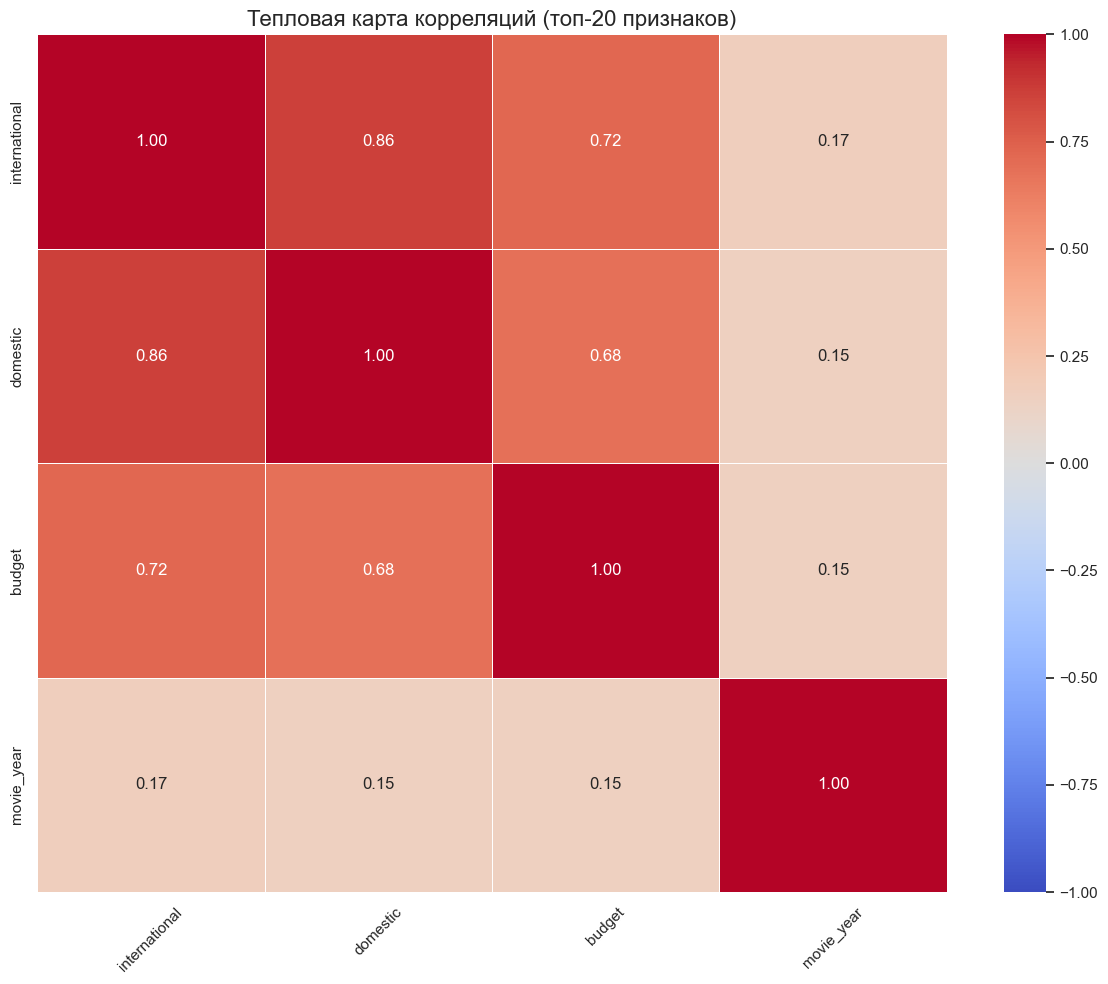

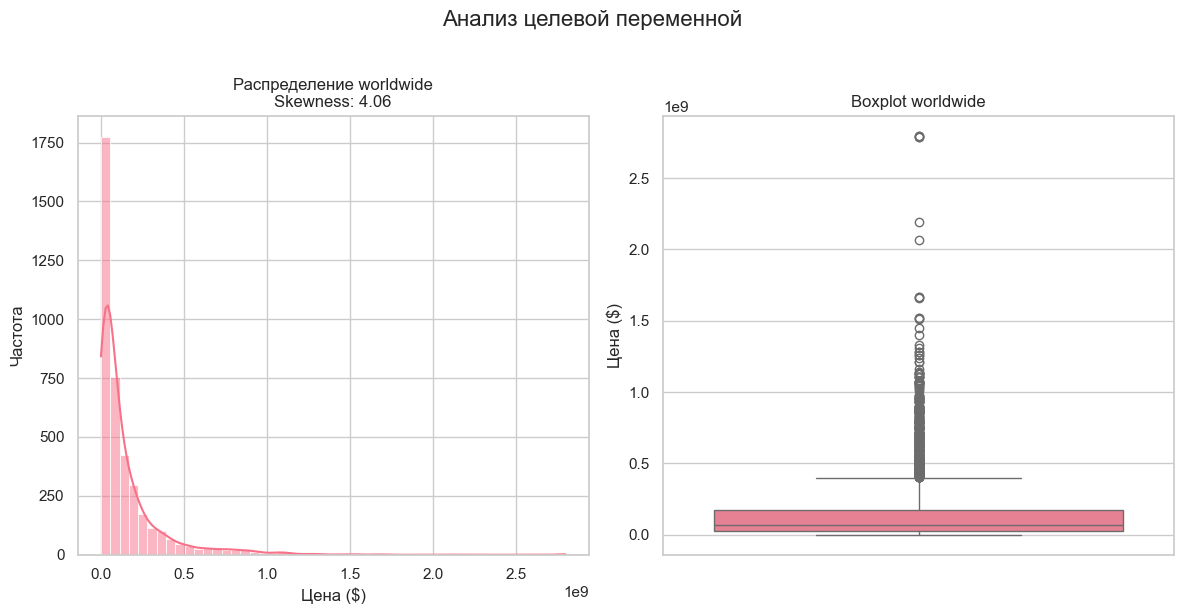

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")


plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# 1. Heatmap корреляций числовых признаков
# Выбираем только числовые колонки
numeric_cols = train_data.select_dtypes(include=[np.number]).columns

# Считаем корреляции и сортируем по целевой переменной
corr_matrix = train_data[numeric_cols].corr()
target_corr = corr_matrix['worldwide'].sort_values(ascending=False)

# Визуализируем топ-20 признаков по корреляции
plt.figure(figsize=(12, 10))
top_features = target_corr.index[1:21]  # исключаем сам worldwide
sns.heatmap(train_data[top_features].corr(), 
            annot=True, fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title('Тепловая карта корреляций (топ-20 признаков)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Распределение целевой переменной
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(train_data['worldwide'], kde=True, bins=50)
plt.title(f'Распределение worldwide\nSkewness: {train_data["worldwide"].skew():.2f}')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['worldwide'])
plt.title('Boxplot worldwide')
plt.ylabel('Цена ($)')

plt.suptitle('Анализ целевой переменной', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

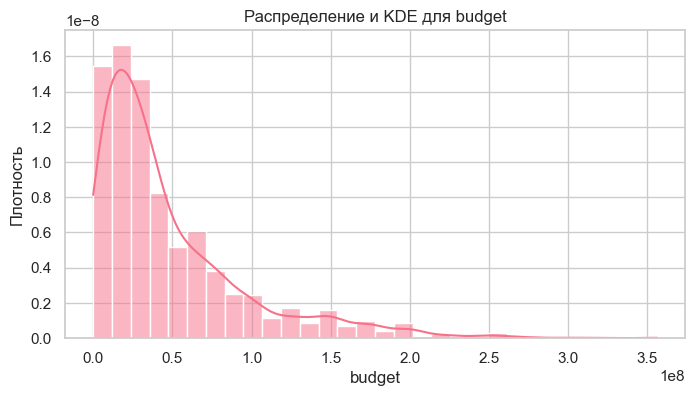

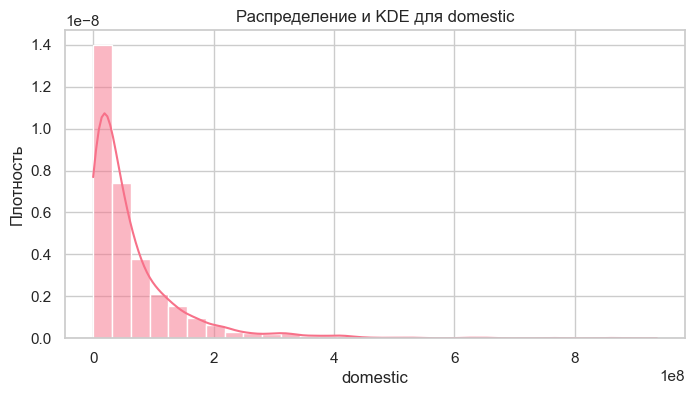

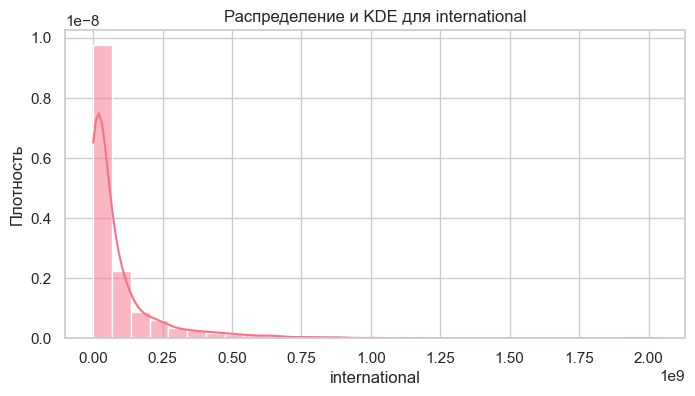

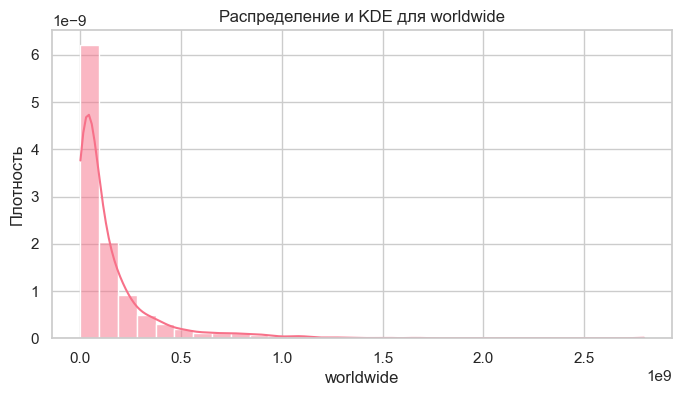

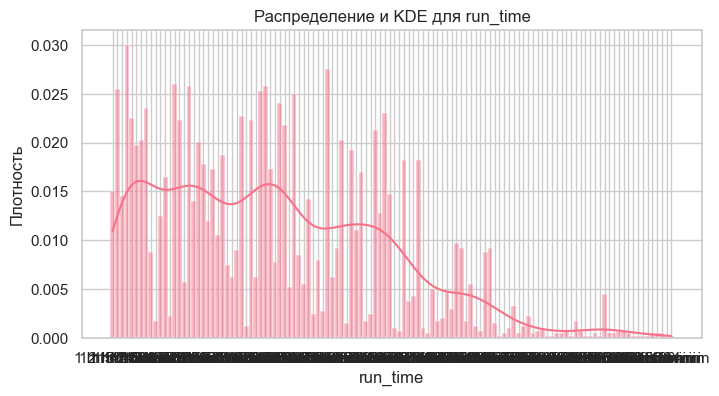

In [12]:
cols = ["budget", "domestic", "international", "worldwide", "run_time"]

for c in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[c].dropna(), kde=True, stat="density", bins=30)
    plt.title(f"Распределение и KDE для {c}")
    plt.xlabel(c)
    plt.ylabel("Плотность")
    plt.show()


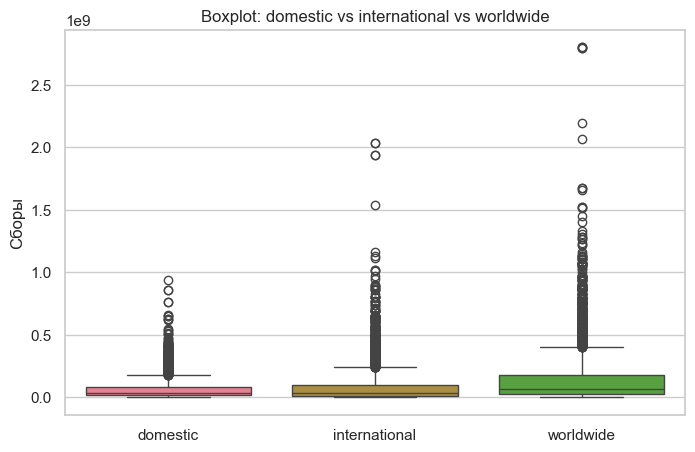

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data[["domestic", "international", "worldwide"]])
plt.title("Boxplot: domestic vs international vs worldwide")
plt.ylabel("Сборы")
plt.show()


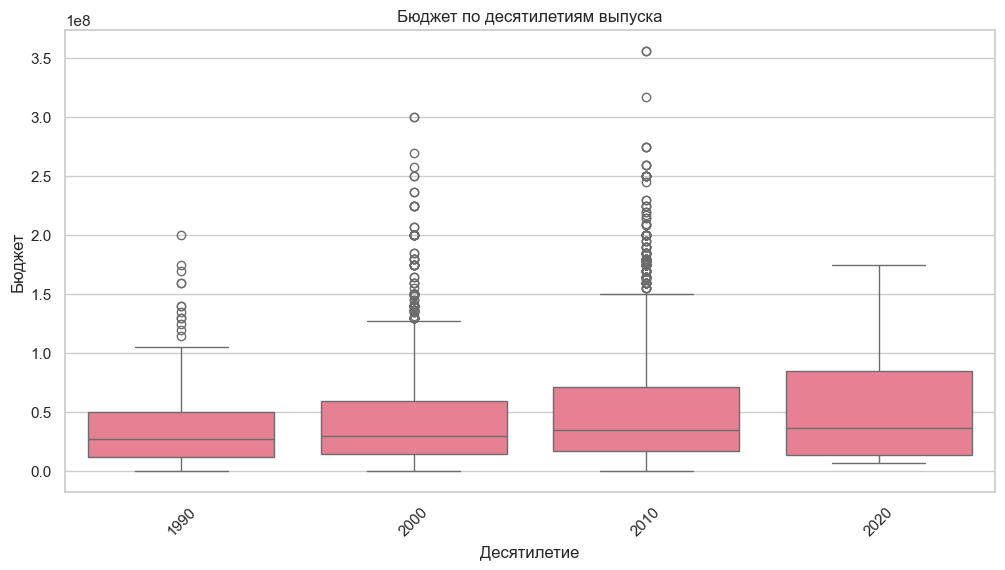

In [14]:
# Добавляем колонку с декадой
train_data["decade"] = (train_data["movie_year"] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(x="decade", y="budget", data=train_data)
plt.title("Бюджет по десятилетиям выпуска")
plt.xlabel("Десятилетие")
plt.ylabel("Бюджет")
plt.xticks(rotation=45)
plt.show()
train_data = train_data.drop("decade", axis=1)


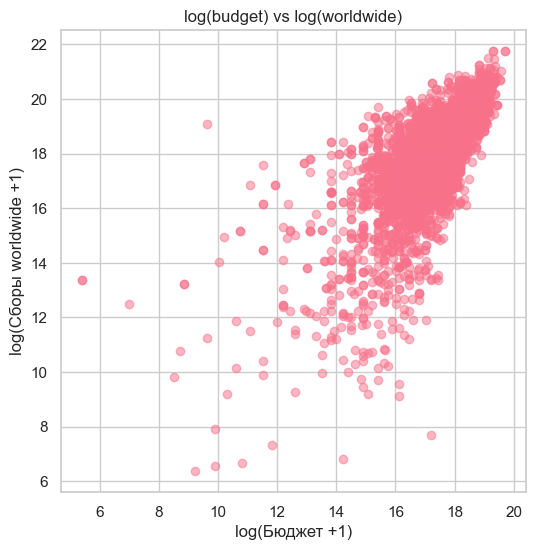

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(
    np.log1p(train_data["budget"]),
    np.log1p(train_data["worldwide"]),
    alpha=0.5
)
plt.title("log(budget) vs log(worldwide)")
plt.xlabel("log(Бюджет +1)")
plt.ylabel("log(Сборы worldwide +1)")
plt.show()


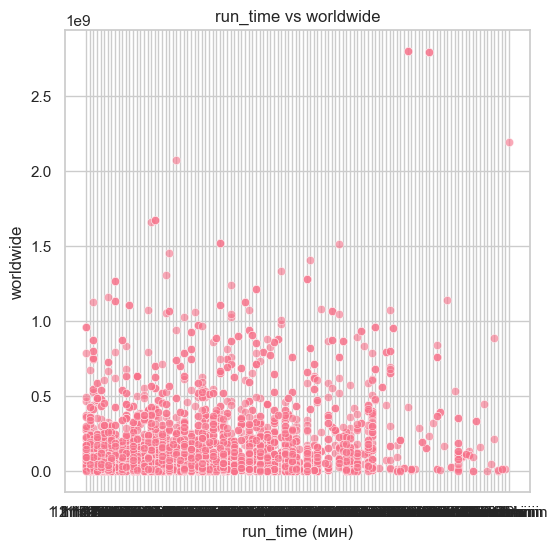

In [16]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="run_time", y="worldwide", data=train_data, alpha=0.6)
plt.title("run_time vs worldwide")
plt.xlabel("run_time (мин)")
plt.ylabel("worldwide")
plt.show()

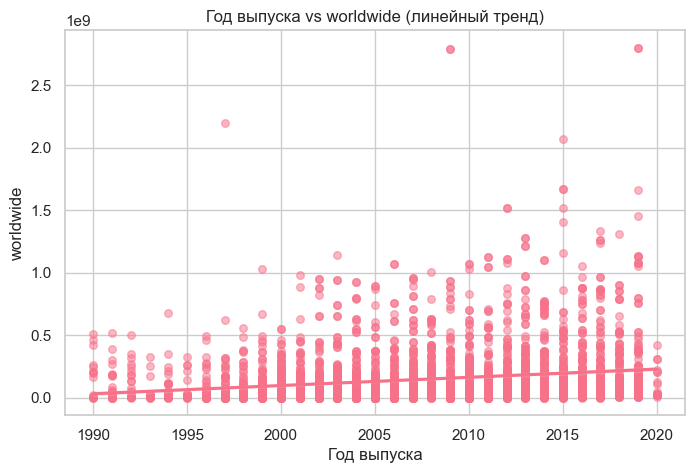

In [17]:
plt.figure(figsize=(8, 5))
sns.regplot(x="movie_year", y="worldwide", data=train_data, scatter_kws={"s":30, "alpha":0.5})
plt.title("Год выпуска vs worldwide (линейный тренд)")
plt.xlabel("Год выпуска")
plt.ylabel("worldwide")
plt.show()

/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/4175277712.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y="median", data=stats, palette="viridis")


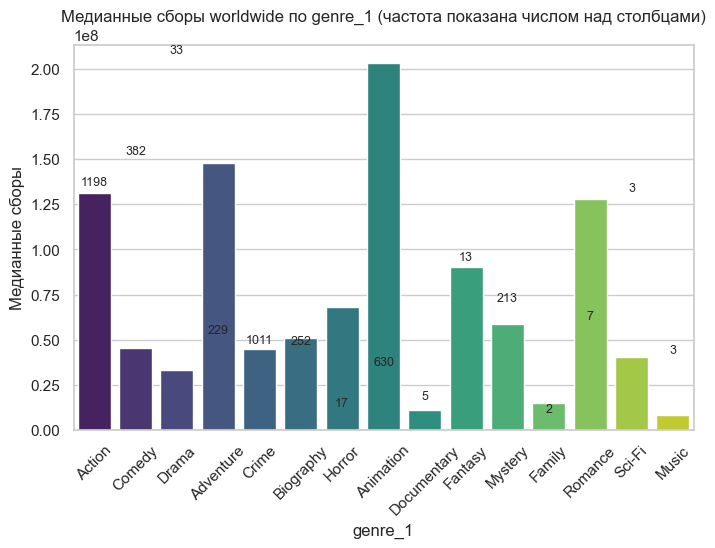

/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/4175277712.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y="median", data=stats, palette="viridis")


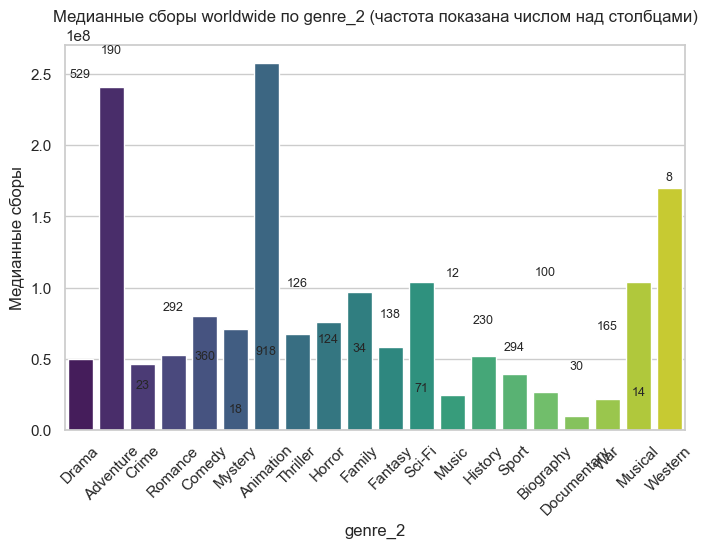

/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/4175277712.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y="median", data=stats, palette="viridis")


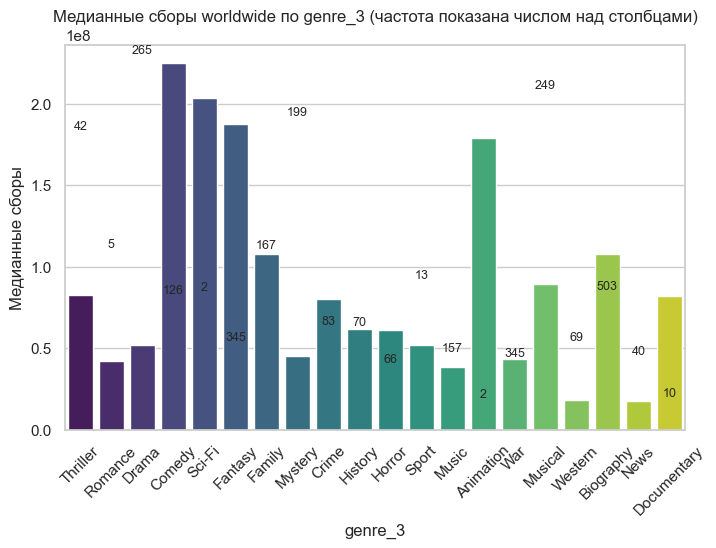

/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/4175277712.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g, y="median", data=stats, palette="viridis")


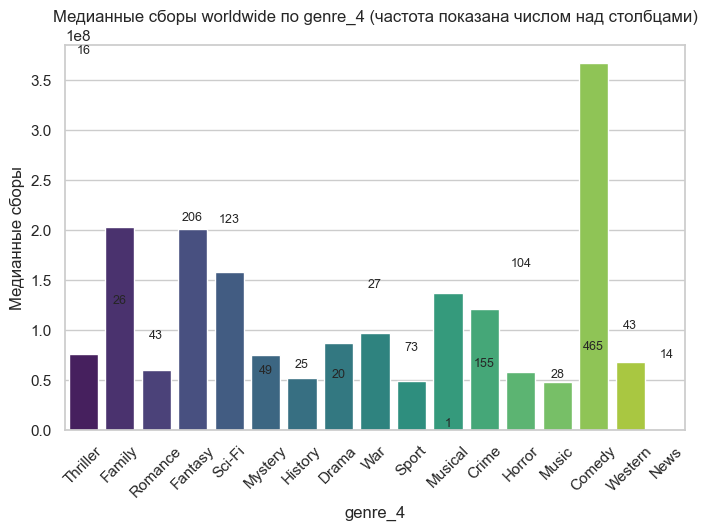

In [18]:
for g in ["genre_1","genre_2","genre_3","genre_4"]:
    stats = (
        train_data
        .dropna(subset=[g])
        .groupby(g)["worldwide"]
        .agg(["count","median"])
        .reset_index()
        .sort_values("count", ascending=False)
    )
    plt.figure(figsize=(8, 5))
    sns.barplot(x=g, y="median", data=stats, palette="viridis")
    plt.title(f"Медианные сборы worldwide по {g} (частота показана числом над столбцами)")
    plt.xlabel(g)
    plt.ylabel("Медианные сборы")
    for idx, row in stats.iterrows():
        plt.text(idx, row["median"] + 0.02*row["median"], int(row["count"]), 
                 ha="center", va="bottom", fontsize=9)
    plt.xticks(rotation=45)
    plt.show()


In [19]:
# ==============================================================================
# >>> ОБНОВЛЕННЫЙ БЛОК: Создание признаков опыта и СОХРАНЕНИЕ КАРТ <<<
# ==============================================================================

# Инициализируем словари для карт, которые мы хотим сохранить
# Это нужно сделать один раз где-то в начале вашего скрипта предобработки,
# если вы еще этого не сделали. Если уже сделали, эту строку можно пропустить.
# Для примера, я добавлю инициализацию здесь, но лучше вынести ее выше.
if 'experience_maps_to_save' not in globals(): # Проверяем, существует ли переменная
    experience_maps_to_save = {}
    print("Инициализирован 'experience_maps_to_save'")

personnel_cols_for_experience = ["director", "writer", "producer", "composer", "cinematographer"]
print("\nСоздание признаков опыта для съемочной группы и сохранение карт...")
for col in personnel_cols_for_experience:
    if col in train_data.columns:
        counts = train_data[col].value_counts()
        # СОХРАНЯЕМ КАРТУ (словарь: имя -> количество)
        experience_maps_to_save[f"{col}_experience_map"] = counts.to_dict()
        
        train_data[f"{col}_experience"] = train_data[col].map(counts)
        # Заполняем пропуски нулями, если после map остались NaN 
        # (например, для значений, которых не было в train_data[col] при подсчете counts,
        # или если train_data[col] имел NaN)
        train_data[f"{col}_experience"].fillna(0, inplace=True)
        print(f"  Создан признак {col}_experience и сохранена карта.")
    else:
        print(f"  Предупреждение: столбец {col} не найден в train_data для создания опыта.")

# Опыт главных актёров и суммарная "звёздность"
actor_experience_cols_generated = [] # Будем хранить имена созданных колонок опыта
print("\nСоздание признаков опыта для актеров и сохранение карт...")
for i in range(1, 5): # main_actor_1, main_actor_2, main_actor_3, main_actor_4
    col_actor = f"main_actor_{i}"
    if col_actor in train_data.columns:
        counts_actor = train_data[col_actor].value_counts()
        # СОХРАНЯЕМ КАРТУ
        experience_maps_to_save[f"{col_actor}_experience_map"] = counts_actor.to_dict()
        
        experience_col_name = f"{col_actor}_experience"
        train_data[experience_col_name] = train_data[col_actor].map(counts_actor)
        train_data[experience_col_name].fillna(0, inplace=True)
        actor_experience_cols_generated.append(experience_col_name)
        print(f"  Создан признак {experience_col_name} и сохранена карта.")
    else:
        print(f"  Предупреждение: столбец {col_actor} не найден для создания опыта.")

# Суммарная "звёздность"
if actor_experience_cols_generated: # Только если были созданы колонки опыта актеров
    train_data["cast_popularity"] = train_data[actor_experience_cols_generated].sum(axis=1)
    print("  Создан признак cast_popularity.")
else:
    train_data["cast_popularity"] = 0 
    print("  Признак cast_popularity установлен в 0 (колонки опыта актеров не созданы).")

print("\nСловарь experience_maps_to_save (пример):")
# Выведем первые несколько ключей для проверки
for k in list(experience_maps_to_save.keys())[:2]:
    print(f"  {k}: {list(experience_maps_to_save[k].items())[:2]}...") # Первые 2 элемента карты

# ==============================================================================
# >>> КОНЕЦ ОБНОВЛЕННОГО БЛОКА <<<
# ==============================================================================


Создание признаков опыта для съемочной группы и сохранение карт...
  Создан признак director_experience и сохранена карта.
  Создан признак writer_experience и сохранена карта.
  Создан признак producer_experience и сохранена карта.
  Создан признак composer_experience и сохранена карта.
  Создан признак cinematographer_experience и сохранена карта.

Создание признаков опыта для актеров и сохранение карт...
  Создан признак main_actor_1_experience и сохранена карта.
  Создан признак main_actor_2_experience и сохранена карта.
  Создан признак main_actor_3_experience и сохранена карта.
  Создан признак main_actor_4_experience и сохранена карта.
  Создан признак cast_popularity.

Словарь experience_maps_to_save (пример):
  director_experience_map: [('Clint Eastwood', 26), ('Ridley Scott', 23)]...
  writer_experience_map: [('Luc Besson', 17), ('Quentin Tarantino', 14)]...


/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/3984697030.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[f"{col}_experience"].fillna(0, inplace=True)
/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/3984697030.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [20]:
import re

def convert_runtime_to_minutes(value):
    match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', str(value))
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None  # если формат не распознан

train_data['run_time'] = train_data['run_time'].apply(convert_runtime_to_minutes)


In [21]:
from sklearn.impute import SimpleImputer

num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])


In [22]:
'''from sklearn.impute import SimpleImputer

num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
train_data[num_cols] = imputer.fit_transform(train_data[num_cols])
train_data.head()'''

"from sklearn.impute import SimpleImputer\n\nnum_cols = train_data.select_dtypes(include=['int64', 'float64']).columns\nimputer = SimpleImputer(strategy='mean')\ntrain_data[num_cols] = imputer.fit_transform(train_data[num_cols])\ntrain_data.head()"

In [23]:
train_data['director']

4482            Sanaa Hamri
4803            R.J. Cutler
4890         Sharon Maguire
5509          Travis Knight
2124    Alfonso Gomez-Rejon
               ...         
3774           David Zucker
5197            Matt Reeves
5232             Shawn Levy
5396         Leigh Whannell
860        Scott Derrickson
Name: director, Length: 3998, dtype: object

In [24]:
nan_data = (train_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
19,genre_4,64.532266
20,distributor,42.921461
18,genre_3,31.015508
17,genre_2,8.054027
14,mpaa,3.851926
5,cinematographer,3.526763
4,composer,3.226613
3,producer,0.275138
2,writer,0.175088
9,main_actor_4,0.075038


In [25]:
genre_cols = ["genre_1", "genre_2", "genre_3", "genre_4"]
# число жанров
'''train_data["num_genres"] = train_data[genre_cols].notna().sum(axis=1)
genres = train_data[genre_cols].apply(lambda row: [g for g in row if pd.notna(g)], axis=1)
family_genres = {"Animation", "Family", "Adventure"}
train_data["is_family_friendly"] = genres.apply(lambda gl: int(bool(set(gl) & family_genres)))
'''

'train_data["num_genres"] = train_data[genre_cols].notna().sum(axis=1)\ngenres = train_data[genre_cols].apply(lambda row: [g for g in row if pd.notna(g)], axis=1)\nfamily_genres = {"Animation", "Family", "Adventure"}\ntrain_data["is_family_friendly"] = genres.apply(lambda gl: int(bool(set(gl) & family_genres)))\n'

In [26]:
# ==============================================================================
# >>> ОБНОВЛЕННЫЙ БЛОК: Групповая импутация и СОХРАНЕНИЕ КАРТ МОД <<<
# ==============================================================================

cols_for_grouped_imputation = ['cinematographer', 'composer', 'producer', 'writer'] # Переименовал для ясности

# Инициализируем словарь для карт мод, если еще не сделано
if 'grouped_imputation_maps_to_save' not in globals():
    grouped_imputation_maps_to_save = {}
    print("Инициализирован 'grouped_imputation_maps_to_save'")

print("\nГрупповая импутация (модой по 'director') и сохранение карт мод...")
if 'director' in train_data.columns:
    for col_to_impute in cols_for_grouped_imputation:
        if col_to_impute in train_data.columns:
            print(f"  Обработка колонки '{col_to_impute}'...")
            
            # 1. СОХРАНЯЕМ КАРТУ: director -> mode_of_col_to_impute
            # Эта карта будет содержать для каждого режиссера наиболее частый cinematographer/composer и т.д.
            # np.nan будет, если для режиссера все значения в col_to_impute были NaN или группа пуста
            director_to_mode_map = train_data.groupby('director')[col_to_impute].apply(
                lambda x: x.mode().iloc[0] if not x.mode().empty and not x.mode().isnull().all() else np.nan
            )
            grouped_imputation_maps_to_save[f"{col_to_impute}_director_mode_map"] = director_to_mode_map.to_dict()
            print(f"    Карта мод для '{col_to_impute}' по 'director' сохранена.")
            # print(f"    Пример карты для {col_to_impute}: {list(director_to_mode_map.items())[:2]}") # Для отладки

            # 2. ПРИМЕНЯЕМ ИМПУТАЦИЮ, используя созданную карту
            # Сначала получаем серию мод для каждого значения в 'director' текущей строки
            # Если режиссера нет в карте (например, новый режиссер в тестовых данных), map вернет NaN
            mapped_modes_for_imputation = train_data['director'].map(director_to_mode_map)
            
            # Заполняем пропуски в col_to_impute значениями из mapped_modes_for_imputation
            train_data[col_to_impute].fillna(mapped_modes_for_imputation, inplace=True)
            print(f"    Пропуски в '{col_to_impute}' заполнены с использованием сохраненной карты мод.")
        else:
            print(f"  Предупреждение: столбец '{col_to_impute}' не найден для групповой импутации.")
else:
    print("  Предупреждение: столбец 'director' не найден, групповая импутация не будет выполнена.")

print("\nСловарь grouped_imputation_maps_to_save (пример):")
for k in list(grouped_imputation_maps_to_save.keys())[:2]:
    print(f"  {k}: {list(grouped_imputation_maps_to_save[k].items())[:2]}...")

# ==============================================================================
# >>> КОНЕЦ ОБНОВЛЕННОГО БЛОКА <<<
# ==============================================================================


Групповая импутация (модой по 'director') и сохранение карт мод...
  Обработка колонки 'cinematographer'...
    Карта мод для 'cinematographer' по 'director' сохранена.
    Пропуски в 'cinematographer' заполнены с использованием сохраненной карты мод.
  Обработка колонки 'composer'...
    Карта мод для 'composer' по 'director' сохранена.
    Пропуски в 'composer' заполнены с использованием сохраненной карты мод.
  Обработка колонки 'producer'...
    Карта мод для 'producer' по 'director' сохранена.
    Пропуски в 'producer' заполнены с использованием сохраненной карты мод.
  Обработка колонки 'writer'...


/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/3934260739.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col_to_impute].fillna(mapped_modes_for_imputation, inplace=True)
/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/3934260739.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

    Карта мод для 'writer' по 'director' сохранена.
    Пропуски в 'writer' заполнены с использованием сохраненной карты мод.

Словарь grouped_imputation_maps_to_save (пример):
  cinematographer_director_mode_map: [('Aaron Horvath', nan), ('Aaron Schneider', 'David Boyd')]...
  composer_director_mode_map: [('Aaron Horvath', 'Jared Faber'), ('Aaron Schneider', 'Jan A.P. Kaczmarek')]...


/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/3934260739.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col_to_impute].fillna(mapped_modes_for_imputation, inplace=True)


In [27]:
columns_to_fill = ['genre_2', 'genre_3', 'genre_4', 'main_actor_4']
train_data[columns_to_fill] = train_data[columns_to_fill].fillna('Unknown')


In [28]:
cat_cols = train_data.select_dtypes(include=['object']).columns

cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])

In [29]:
nan_data = (train_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
0,movie_year,0.0
16,genre_1,0.0
29,main_actor_4_experience,0.0
28,main_actor_3_experience,0.0
27,main_actor_2_experience,0.0
26,main_actor_1_experience,0.0
25,cinematographer_experience,0.0
24,composer_experience,0.0
23,producer_experience,0.0
22,writer_experience,0.0


In [30]:
train_data['run_time']

4482    119.0
4803    107.0
4890    123.0
5509    101.0
2124    105.0
        ...  
3774     83.0
5197    130.0
5232    119.0
5396     97.0
860     119.0
Name: run_time, Length: 3998, dtype: float64

In [31]:
train_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,director_experience,writer_experience,producer_experience,composer_experience,cinematographer_experience,main_actor_1_experience,main_actor_2_experience,main_actor_3_experience,main_actor_4_experience,cast_popularity
4482,2008.0,Sanaa Hamri,Elizabeth Chandler,Debra Martin Chase,Rachel Portman,Jim Denault,America Ferrera,Alexis Bledel,Amber Tamblyn,Blake Lively,...,1.0,1.0,7.0,22.0,13.0,1.0,3.0,1.0,3.0,8.0
4803,2014.0,R.J. Cutler,Shauna Cross,Alison Greenspan,Heitor Pereira,John de Borman,Chloë Grace Moretz,Mireille Enos,Jamie Blackley,Joshua Leonard,...,1.0,2.0,1.0,15.0,10.0,5.0,1.0,1.0,1.0,8.0
4890,2016.0,Sharon Maguire,Helen Fielding,Tim Bevan,Craig Armstrong,Andrew Dunn,Renée Zellweger,Gemma Jones,Jim Broadbent,Sally Phillips,...,3.0,5.0,43.0,26.0,22.0,7.0,2.0,3.0,2.0,14.0
5509,2016.0,Travis Knight,Marc Haimes,Travis Knight,Dario Marianelli,Frank Passingham,Charlize Theron,Art Parkinson,Matthew McConaughey,Ralph Fiennes,...,1.0,1.0,2.0,10.0,3.0,13.0,1.0,1.0,6.0,21.0
2124,2015.0,Alfonso Gomez-Rejon,Jesse Andrews,Jeremy Dawson,Brian Eno,Chung-hoon Chung,Thomas Mann,RJ Cyler,Olivia Cooke,Nick Offerman,...,2.0,4.0,2.0,3.0,6.0,2.0,2.0,2.0,4.0,10.0


In [32]:
'''import re

def convert_runtime_to_minutes(value):
    match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', str(value))
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None  # если формат не распознан

train_data['run_time'] = train_data['run_time'].apply(convert_runtime_to_minutes)
train_data.head()
'''

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ls/btrdy60n12n_lk3plpt7wqlh0000gn/T/ipykernel_46101/2047955137.py:1: SyntaxWarning: invalid escape sequence '\d'
  '''import re


"import re\n\ndef convert_runtime_to_minutes(value):\n    match = re.match(r'(?:(\\d+)\\s*hr)?\\s*(?:(\\d+)\\s*min)?', str(value))\n    if match:\n        hours = int(match.group(1)) if match.group(1) else 0\n        minutes = int(match.group(2)) if match.group(2) else 0\n        return hours * 60 + minutes\n    return None  # если формат не распознан\n\ntrain_data['run_time'] = train_data['run_time'].apply(convert_runtime_to_minutes)\ntrain_data.head()\n"

In [33]:
# Вывод столбцов и колисество значений с ними
cat_cols = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

cat_stats = pd.DataFrame({
    'Column': cat_cols,
    'Unique_Count': [train_data[col].nunique() for col in cat_cols],
    'Unique_Values': [train_data[col].unique() for col in cat_cols]
})

cat_stats = cat_stats.sort_values(by='Unique_Count', ascending=False)
print(cat_stats[['Column', 'Unique_Count']])

             Column  Unique_Count
8      main_actor_4          2136
7      main_actor_3          1898
1            writer          1863
6      main_actor_2          1564
2          producer          1385
0          director          1380
5      main_actor_1          1173
4   cinematographer           787
3          composer           713
14      distributor           165
11          genre_2            21
12          genre_3            21
13          genre_4            18
10          genre_1            15
9              mpaa             5


In [34]:
columns_for_target_encoding = ['main_actor_4', 'main_actor_3', 'writer', 'main_actor_2', 'producer', 'director', 'main_actor_1', 'cinematographer', 'composer', 'distributor']
columns_for_one_hot = ['genre_2', 'genre_3', 'genre_4', 'genre_1', 'mpaa']

In [35]:
train_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4', 'budget', 'domestic', 'international', 'worldwide',
       'mpaa', 'run_time', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
       'distributor', 'director_experience', 'writer_experience',
       'producer_experience', 'composer_experience',
       'cinematographer_experience', 'main_actor_1_experience',
       'main_actor_2_experience', 'main_actor_3_experience',
       'main_actor_4_experience', 'cast_popularity'],
      dtype='object')

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(train_data[columns_for_one_hot])

# Трансформируем трейн и тест
train_encoded = ohe.transform(train_data[columns_for_one_hot])
#train_data = pd.get_dummies(train_data, columns=columns_for_one_hot)
train_encoded_df = pd.DataFrame(
    train_encoded,
    columns=ohe.get_feature_names_out(columns_for_one_hot),
    index=train_data.index
)
train_data = train_data.drop(columns_for_one_hot, axis=1).join(train_encoded_df)
train_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [37]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=columns_for_target_encoding)
train_data_encoded = encoder.fit_transform(train_data[columns_for_target_encoding], train_data['worldwide'])
train_data[columns_for_target_encoding] = train_data_encoded

In [38]:
train_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,genre_1_Horror,genre_1_Music,genre_1_Mystery,genre_1_Romance,genre_1_Sci-Fi,mpaa_G,mpaa_NC-17,mpaa_PG,mpaa_PG-13,mpaa_R
4482,2008.0,1.345182e+08,1.345182e+08,1.348617e+08,1.045484e+08,1.248082e+08,1.345182e+08,1.317527e+08,1.345182e+08,1.317527e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4803,2014.0,1.389318e+08,1.337451e+08,1.389318e+08,2.625639e+08,1.309102e+08,1.380674e+08,1.389318e+08,1.389318e+08,1.389318e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4890,2016.0,1.614849e+08,1.661032e+08,1.295603e+08,1.379337e+08,1.316244e+08,1.558859e+08,1.570753e+08,1.506852e+08,1.570753e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5509,2016.0,1.386682e+08,1.386682e+08,1.400165e+08,1.417198e+08,1.417403e+08,1.161474e+08,1.386682e+08,1.386682e+08,1.559626e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2124,2015.0,1.282969e+08,1.247797e+08,1.282969e+08,1.308975e+08,1.700476e+08,1.282969e+08,1.282969e+08,1.282969e+08,1.517334e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X = train_data.drop("worldwide", axis=1)
y = train_data["worldwide"]
#y = np.log1p(train_data["worldwide"])

cols_to_drop_for_X = ['worldwide']
if 'domestic' in train_data.columns and 'domestic' not in X.columns: # Если domestic не должен быть в X
    cols_to_drop_for_X.append('domestic')
if 'international' in train_data.columns and 'international' not in X.columns: # Если international не должен быть в X
    cols_to_drop_for_X.append('international')

# Убедимся, что удаляем только существующие
actual_cols_to_drop_for_X = [col for col in cols_to_drop_for_X if col in train_data.columns]

X = train_data.drop(columns=actual_cols_to_drop_for_X)
y = train_data["worldwide"]
print(f"Колонки в X (финальные предикторы, первые 10): {X.columns.tolist()[:10]}")

Колонки в X (финальные предикторы, первые 10): ['movie_year', 'director', 'writer', 'producer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4']


In [40]:
X.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=105)

In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler, QuantileTransformer, PowerTransformer
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

'''model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}") #R²: 0.9981
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")#MSE: 73899943426108.95'''



'''rf = RandomForestRegressor(random_state=42)

# Сетка гиперпараметров
param_grid = {
    'n_estimators': [100, 1000],           # Кол-во деревьев
    'max_depth': [10, 50, None],          # Максимальная глубина
    'min_samples_split': [2, 10],          # Мин. объектов для разделения
    'min_samples_leaf': [1, 5],           # Мин. объектов в листе
    'max_features': ['auto', 'sqrt']      # Кол-во признаков при делении
}

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Test R² Score: {r2:.4f}") # Test R² Score: 0.9801
print(f"Test MSE: {mse:.2f}") #Test MSE: 756709767970853.50'''



'''from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}")#R²: 0.9984
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")#MSE: 61650183675109.39'''



'''from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=1000, learning_rate=0.21, max_depth=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}") # R²: 0.9953
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}") #MSE: 180661829545789.47'''



'''from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f"R²: {r2_score(y_val, y_pred):.4f}") # MSE: 145843899870827.59
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}") # R²: 0.9962'''



param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth':    [4, 6, 8],
    'learning_rate':[0.01, 0.05, 0.1],
    'subsample':    [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha':    [0, 0.5, 1],
    'reg_lambda':   [1, 2, 5]
}

# 4) Создаём XGB с фиксированным seed и детерминированным методом
base_model = XGBRegressor(
    random_state=42,
    tree_method='hist',            # более детерминированный
    enable_categorical=False,
    n_jobs=1
)

# 5) RandomizedSearchCV с фиксированным seed
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=1,              # лучше 1, чтобы исключить недетерминированность
    random_state=42
)

# 6) Обучаем
random_search.fit(X_train, y_train)

# 7) Оцениваем
best = random_search.best_estimator_
y_pred = best.predict(X_val)
print(f"R²:  {r2_score(y_val, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_val, y_pred):.2f}")
#Best Params: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
#Best R² Score on Test: 0.9990
#Best MSE on Test: 37542782216082.52

#Best R² Score on Test: 0.9990
#Best MSE on Test: 36496695202244.70

#Best R² Score on Test: 0.9991
#Best MSE on Test: 32663862493933.65


#R²:  0.9993
#MSE: 28215564467164.59


'''param_dist = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'random_strength': [0.5, 1, 2]
}

# Создаём модель
cat = CatBoostRegressor(verbose=0, random_seed=42)

# RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best Parameters: {'subsample': 0.8, 'random_strength': 0.5, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 6}
#Best R²: 0.9978
#Best MSE: 83318573388615.64 '''




'''param_dist = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 4, 6, 8, 10],
    'num_leaves': [31, 50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Модель
lgb = LGBMRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказание и метрики
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'num_leaves': 31, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
#Best R²: 0.9959
#Best MSE: 157899903576786.03'''


Fitting 3 folds for each of 20 candidates, totalling 60 fits
R²:  0.9991
MSE: 35455331685187.09


'param_dist = {\n    \'n_estimators\': [200, 500, 1000],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'max_depth\': [-1, 4, 6, 8, 10],\n    \'num_leaves\': [31, 50, 100, 150],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'reg_alpha\': [0, 0.1, 1],\n    \'reg_lambda\': [0, 0.1, 1]\n}\n\n# Модель\nlgb = LGBMRegressor(random_state=42)\n\n# Randomized Search\nrandom_search = RandomizedSearchCV(\n    estimator=lgb,\n    param_distributions=param_dist,\n    n_iter=20,\n    scoring=\'neg_mean_squared_error\',\n    cv=3,\n    verbose=1,\n    n_jobs=-1\n)\n\n# Обучение\nrandom_search.fit(X_train, y_train)\n\n# Лучшая модель и параметры\nbest_model = random_search.best_estimator_\nprint("Best Parameters:", random_search.best_params_)\n\n# Предсказание и метрики\ny_pred = best_model.predict(X_val)\nr2 = r2_score(y_val, y_pred)\nmse = mean_squared_error(y_val, y_pred)\n\nprint(f"Best R²: {r2:.4f}")\nprint(f"Best MSE: {mse:.2f}")\n#Best Parameters:

In [44]:
'''param_dist = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 4, 6, 8, 10],
    'num_leaves': [31, 50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Модель
lgb = LGBMRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказание и метрики
y_pred = best_model.predict(X_val)# Обратное преобразование: экспоненцируем предсказания
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)
print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best R²: 0.9981
#Best MSE: 73636379429094.73'''




'''param_dist = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'random_strength': [0.5, 1, 2]
}

# Создаём модель
cat = CatBoostRegressor(verbose=0, random_seed=42)

# RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение
random_search.fit(X_train, y_train)

# Лучшая модель
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)

print(f"Best R²: {r2:.4f}")
print(f"Best MSE: {mse:.2f}")
#Best R²: 0.9934
#Best MSE: 252026444906922.81'''



'''param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 2, 5]
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
from sklearn.metrics import r2_score, mean_squared_error

# Лучшая модель из RandomizedSearchCV
best_model = random_search.best_estimator_

# Предсказания на тестовой выборке
y_pred = best_model.predict(X_val)
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)

print(f"Best R² Score on Test: {r2:.4f}")
print(f"Best MSE on Test: {mse:.2f}")
#Best R² Score on Test: 0.9975
#Best MSE on Test: 95385734348795.59'''





'''rf = RandomForestRegressor(random_state=42)

# Сетка гиперпараметров
param_grid = {
    'n_estimators': [100, 1000],           # Кол-во деревьев
    'max_depth': [10, 50, None],          # Максимальная глубина
    'min_samples_split': [2, 10],          # Мин. объектов для разделения
    'min_samples_leaf': [1, 5],           # Мин. объектов в листе
    'max_features': ['auto', 'sqrt']      # Кол-во признаков при делении
}

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Предсказания и метрики
y_pred = best_model.predict(X_val)
y_pred_original = np.expm1(y_pred)  # Возвращаем обратно в исходный масштаб

# Метрики
r2 = r2_score(np.expm1(y_val), y_pred_original)  # Обратно логарифмируем y_val для расчета метрик
mse = mean_squared_error(np.expm1(y_val), y_pred_original)

print(f"Test R² Score: {r2:.4f}")
print(f"Test MSE: {mse:.2f}") 
#Test R² Score: 0.9648
#Test MSE: 1341694408103681.00'''




'rf = RandomForestRegressor(random_state=42)\n\n# Сетка гиперпараметров\nparam_grid = {\n    \'n_estimators\': [100, 1000],           # Кол-во деревьев\n    \'max_depth\': [10, 50, None],          # Максимальная глубина\n    \'min_samples_split\': [2, 10],          # Мин. объектов для разделения\n    \'min_samples_leaf\': [1, 5],           # Мин. объектов в листе\n    \'max_features\': [\'auto\', \'sqrt\']      # Кол-во признаков при делении\n}\n\n# GridSearch с кросс-валидацией\ngrid_search = GridSearchCV(estimator=rf,\n                           param_grid=param_grid,\n                           cv=3,\n                           scoring=\'r2\',\n                           n_jobs=-1,\n                           verbose=1)\n\n# Обучение модели\ngrid_search.fit(X_train, y_train)\n\n# Лучшая модель и параметры\nbest_model = grid_search.best_estimator_\nprint("Best parameters:", grid_search.best_params_)\n\n# Предсказания и метрики\ny_pred = best_model.predict(X_val)\ny_pred_original = np

TEST DATA

In [45]:
test_data = pd.read_csv('test.csv')

In [46]:
test_movie_title = test_data['movie_title']
columns_to_drop = ['movie_id', 'movie_title', 'link']
#columns_to_drop = ['movie_id', 'link']
test_data = test_data.drop(columns=columns_to_drop)

In [47]:
for col in ["director", "writer", "producer", "composer", "cinematographer"]:
    counts = train_data[col].value_counts()
    test_data[f"{col}_experience"] = test_data[col].map(counts).fillna(0)
for i in range(1, 5):
    col = f"main_actor_{i}"
    counts = train_data[col].value_counts()
    test_data[f"{col}_experience"] = test_data[col].map(counts).fillna(0)

test_data["cast_popularity"] = sum(test_data[f"main_actor_{i}_experience"] for i in range(1, 5))
test_data.head()

,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,...,director_experience,writer_experience,producer_experience,composer_experience,cinematographer_experience,main_actor_1_experience,main_actor_2_experience,main_actor_3_experience,main_actor_4_experience,cast_popularity
0,2012,Peter Ramsey,David Lindsay-Abaire,Nancy Bernstein,Alexandre Desplat,NaN,Hugh Jackman,Alec Baldwin,Isla Fisher,Chris Pine,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,Rob Cohen,Ken Li,Neal H. Moritz,BT,Ericson Core,Vin Diesel,Paul Walker,Michelle Rodriguez,Jordana Brewster,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003,Sam Weisman,Fred Wolf,Jack Giarraputo,Christophe Beck,Thomas E. Ackerman,David Spade,Mary McCormack,Alyssa Milano,Craig Bierko,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,Tim Burton,Ehren Kruger,Katterli Frauenfelder,Danny Elfman,Ben Davis,Colin Farrell,Michael Keaton,Danny DeVito,Eva Green,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,Shane Black,Fred Dekker,John Davis,Henry Jackman,Larry Fong,Boyd Holbrook,Trevante Rhodes,Jacob Tremblay,Keegan-Michael Key,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
def convert_runtime_to_minutes(value):
    match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', str(value))
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    return None  # если формат не распознан

test_data['run_time'] = test_data['run_time'].apply(convert_runtime_to_minutes)

In [49]:
test_num_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
print(test_num_cols)
test_data[test_num_cols] = num_imputer.transform(test_data[test_num_cols])

Index(['movie_year', 'budget', 'domestic', 'international', 'worldwide',
       'run_time', 'director_experience', 'writer_experience',
       'producer_experience', 'composer_experience',
       'cinematographer_experience', 'main_actor_1_experience',
       'main_actor_2_experience', 'main_actor_3_experience',
       'main_actor_4_experience', 'cast_popularity'],
      dtype='object')


In [50]:
cols_to_fill = ['cinematographer', 'composer', 'producer', 'writer']

for col in cols_to_fill:
    mode_values = train_data.groupby('director')[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    test_data[col] = test_data.apply(lambda row: mode_values.get(row['director'], np.nan) if pd.isnull(row[col]) else row[col], axis=1)


In [51]:
columns_to_fill = ['genre_2', 'genre_3', 'genre_4', 'main_actor_4']
test_data[columns_to_fill] = test_data[columns_to_fill].fillna('Unknown')

cat_cols = test_data.select_dtypes(include=['object']).columns

test_data[cat_cols] = cat_imputer.fit_transform(test_data[cat_cols])

In [52]:
nan_data = (test_data.isnull().mean() * 100).reset_index()
nan_data.columns = ["column_name", "percentage"]
nan_data.sort_values("percentage", ascending=False, inplace=True)
nan_data.head(24)

,column_name,percentage
0,movie_year,0.0
16,genre_1,0.0
29,main_actor_4_experience,0.0
28,main_actor_3_experience,0.0
27,main_actor_2_experience,0.0
26,main_actor_1_experience,0.0
25,cinematographer_experience,0.0
24,composer_experience,0.0
23,producer_experience,0.0
22,writer_experience,0.0


In [53]:
test_encoded = ohe.transform(test_data[columns_for_one_hot])
test_encoded_df = pd.DataFrame(
    test_encoded,
    columns=ohe.get_feature_names_out(columns_for_one_hot),
    index=test_data.index
)

test_data = test_data.drop(columns_for_one_hot, axis=1).join(test_encoded_df)
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)
test_data.columns


Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [54]:
test_data_encoded = encoder.fit_transform(test_data[columns_for_target_encoding], test_data['worldwide'])
test_data[columns_for_target_encoding] = test_data_encoded


In [55]:
X_test =test_data.drop("worldwide", axis=1)
y_test = test_data["worldwide"]

In [56]:
train_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [57]:
test_data.columns

Index(['movie_year', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4',
       ...
       'genre_1_Horror', 'genre_1_Music', 'genre_1_Mystery', 'genre_1_Romance',
       'genre_1_Sci-Fi', 'mpaa_G', 'mpaa_NC-17', 'mpaa_PG', 'mpaa_PG-13',
       'mpaa_R'],
      dtype='object', length=106)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
y_pred = best.predict(X_test)
print(f"R²:  {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

R²:  0.9972
MSE: 118147185723014.45


In [60]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

MAE: 6922929.31


In [61]:
y_pred

array([3.1589274e+08, 2.1270691e+08, 1.7575778e+07, ..., 3.9164962e+06,
       2.4207330e+07, 2.1090068e+07], dtype=float32)

In [62]:
# ==============================================================================
# >>> ОБНОВЛЕННЫЙ БЛОК СОХРАНЕНИЯ АРТЕФАКТОВ <<<
# Использует experience_maps_to_save и grouped_imputation_maps_to_save,
# которые должны быть определены и заполнены ранее в ноутбуке.
# ==============================================================================
import joblib
import json
import os
import pandas as pd # Убедимся, что pandas импортирован для pd.isna
import numpy as np  # Убедимся, что numpy импортирован для np.nan

# --- 0. Определяем директорию для сохранения ---
MODEL_SAVE_DIR = "saved_model_a5" 
if not os.path.exists(MODEL_SAVE_DIR):
    os.makedirs(MODEL_SAVE_DIR)
print(f"Артефакты будут сохранены в директорию: {MODEL_SAVE_DIR}")

# --- 1. Сохранение обученной модели ---
# Ваш 'best' - это XGBRegressor (обертка sklearn)
# Если вы хотите сохранить его как XGBRegressor, используйте joblib
model_filename_joblib = os.path.join(MODEL_SAVE_DIR, "movie_box_office_model.joblib")
joblib.dump(best, model_filename_joblib)
print(f"Модель (XGBRegressor) сохранена как: {model_filename_joblib}")

# Если вы хотите сохранить XGBoost Booster в JSON формате (как в вашем tree для predictor.py):
# Убедитесь, что 'best' это действительно XGBoost модель, а не, например, Pipeline
if hasattr(best, 'save_model'): # Проверка, есть ли у объекта метод save_model (как у XGBoost Booster/Regressor)
    model_filename_json = os.path.join(MODEL_SAVE_DIR, "movie_box_office_model.json")
    try:
        # Если 'best' это scikit-learn обертка XGBRegressor, то get_booster() вернет "сырой" Booster
        booster_to_save = best.get_booster() if hasattr(best, 'get_booster') else best
        booster_to_save.save_model(model_filename_json)
        print(f"Модель XGBoost (Booster) также сохранена в JSON формате: {model_filename_json}")
    except Exception as e_save_json:
        print(f"Не удалось сохранить модель в JSON формате: {e_save_json}. Используйте .joblib версию.")
else:
    print("Модель 'best' не имеет метода save_model, JSON версия не сохранена.")


# --- 2. Сохранение трансформеров ---
joblib.dump(num_imputer, os.path.join(MODEL_SAVE_DIR, "numerical_imputer.joblib"))
print("Numerical Imputer сохранен.")

joblib.dump(cat_imputer, os.path.join(MODEL_SAVE_DIR, "categorical_imputer.joblib"))
print("Categorical Imputer сохранен.")

joblib.dump(ohe, os.path.join(MODEL_SAVE_DIR, "onehot_encoder.joblib")) # ohe - ваш sklearn.preprocessing.OneHotEncoder
print("OneHotEncoder сохранен.")

joblib.dump(encoder, os.path.join(MODEL_SAVE_DIR, "target_encoder.joblib")) # encoder - ваш ce.TargetEncoder
print("Target Encoder сохранен.")

joblib.dump(scaler, os.path.join(MODEL_SAVE_DIR, "scaler.joblib")) # scaler - ваш StandardScaler
print("Scaler сохранен.")


# --- 3. Сохранение информации о колонках и карт преобразований ---

# Списки колонок, определенные в вашем ноутбуке:
# columns_to_drop - должен быть определен ранее, например: ['movie_id', 'movie_title', 'link']
# columns_for_one_hot - должен быть определен ранее, например: ['genre_2', 'genre_3', 'genre_4', 'genre_1', 'mpaa']
# columns_for_target_encoding - должен быть определен ранее

# Финальные признаки для модели (X.columns.tolist() ПОСЛЕ OHE и Target Encoding, ДО scaling)
# Убедитесь, что DataFrame 'X' существует на этом этапе и содержит правильные колонки
if 'X' not in globals() or not isinstance(X, pd.DataFrame):
    raise NameError("DataFrame 'X' с финальными признаками не определен перед сохранением column_info.")
final_model_features_list = X.columns.tolist()

# Колонки, на которых обучался numerical_imputer
# Атрибут feature_names_in_ хранит имена колонок, на которых был сделан fit
if not hasattr(num_imputer, 'feature_names_in_'):
    raise AttributeError("Атрибут 'feature_names_in_' отсутствует у num_imputer. Убедитесь, что импьютер был обучен.")
numerical_imputer_cols_fitted_on = num_imputer.feature_names_in_.tolist()
# ВАЖНО: Если 'domestic', 'international', 'worldwide' НЕ являются предикторами,
# они не должны быть в этом списке. Это значит, что num_imputer должен был обучаться
# на DataFrame, из которого эти колонки уже удалены (если они не предикторы).
# Если они попали в fit, predictor.py должен будет их ожидать.
# Рекомендуется обучать num_imputer только на тех числовых колонках, которые являются предикторами и могут иметь пропуски.


# Колонки, на которых обучался categorical_imputer
if not hasattr(cat_imputer, 'feature_names_in_'):
    raise AttributeError("Атрибут 'feature_names_in_' отсутствует у cat_imputer.")
categorical_imputer_cols_fitted_on = cat_imputer.feature_names_in_.tolist()

# Колонки, на которые подавался OneHotEncoder (исходные)
# columns_for_one_hot - это ваш список исходных колонок для OHE
ohe_input_columns_list = columns_for_one_hot

# Колонки для TargetEncoder (исходные)
# columns_for_target_encoding - ваш список
target_encoding_columns_list = columns_for_target_encoding


# Используем experience_maps_to_save и grouped_imputation_maps_to_save,
# которые вы создали и заполнили ранее в ноутбуке.
if 'experience_maps_to_save' not in globals() or 'grouped_imputation_maps_to_save' not in globals():
    print("ПРЕДУПРЕЖДЕНИЕ: 'experience_maps_to_save' или 'grouped_imputation_maps_to_save' не найдены.")
    print("              Карты опыта и/или групповой импутации могут быть не сохранены или сохранены пустыми.")
    # Создаем пустые, чтобы код не упал, но это будет некорректно для predictor.py
    experience_maps_to_save = experience_maps_to_save if 'experience_maps_to_save' in globals() else {}
    grouped_imputation_maps_to_save = grouped_imputation_maps_to_save if 'grouped_imputation_maps_to_save' in globals() else {}


column_info_data = {
    "features": final_model_features_list, # Финальные признаки для модели
    "target": "worldwide",                 # Имя целевой переменной
    
    "initial_columns_to_drop": columns_to_drop, # Начальные колонки для удаления
    "ohe_input_columns": ohe_input_columns_list, # Исходные колонки для OneHotEncoder
    "target_encoding_columns": target_encoding_columns_list, # Исходные колонки для TargetEncoder

    "numerical_imputer_features_in": numerical_imputer_cols_fitted_on,
    "categorical_imputer_features_in": categorical_imputer_cols_fitted_on,

    "experience_maps": experience_maps_to_save, 
    "grouped_imputation_maps": grouped_imputation_maps_to_save,
    
    # Списки колонок, которые могут помочь predictor.py понять логику вашего ноутбука
    "personnel_cols_for_experience": ["director", "writer", "producer", "composer", "cinematographer"],
    "actor_cols_for_experience_prefix": "main_actor_",
    # Колонки, которые импьютировались модой по 'director'
    "cols_for_grouped_imputation_source_director": ['cinematographer', 'composer', 'producer', 'writer'], # Из вашего кода
    # Колонки, которые заполнялись 'Unknown'
    "cols_to_fill_unknown_specific": ['genre_2', 'genre_3', 'genre_4', 'main_actor_4'] # Из вашего кода
}

# Очистка np.nan для JSON сериализации в картах
def clean_map_for_json(data_map):
    if not isinstance(data_map, dict): return {} # Если не словарь, возвращаем пустой
    cleaned = {}
    for map_key, inner_dict in data_map.items():
        if isinstance(inner_dict, dict):
             cleaned[map_key] = {str(k): (None if pd.isna(v) else v) for k, v in inner_dict.items()}
        else: # Если значение в data_map не словарь (маловероятно для карт, но для безопасности)
            cleaned[map_key] = None if pd.isna(inner_dict) else inner_dict 
    return cleaned

# Применяем очистку только если карты не пустые
if column_info_data["experience_maps"]:
    column_info_data["experience_maps"] = clean_map_for_json(column_info_data["experience_maps"])
if column_info_data["grouped_imputation_maps"]:
    column_info_data["grouped_imputation_maps"] = clean_map_for_json(column_info_data["grouped_imputation_maps"])


column_info_filename = os.path.join(MODEL_SAVE_DIR, "column_info.json")
with open(column_info_filename, "w", encoding='utf-8') as f:
    json.dump(column_info_data, f, indent=2, ensure_ascii=False)
print(f"Информация о колонках сохранена как: {column_info_filename}")

# --- 4. (Опционально) Сохранение all_data.csv, если generate_options.py его оттуда читает ---
# import shutil
# source_all_data = "all_data.csv" # Укажите правильный путь к вашему all_data.csv
# if os.path.exists(source_all_data):
#    dest_all_data = os.path.join(MODEL_SAVE_DIR, "all_data.csv")
#    shutil.copyfile(source_all_data, dest_all_data)
#    print(f"Файл {source_all_data} скопирован в {dest_all_data}")
# else:
#    print(f"ПРЕДУПРЕЖДЕНИЕ: Исходный файл {source_all_data} не найден, не скопирован.")

print(">>> СОХРАНЕНИЕ АРТЕФАКТОВ ЗАВЕРШЕНО <<<")
# ==============================================================================

Артефакты будут сохранены в директорию: saved_model_a5
Модель (XGBRegressor) сохранена как: saved_model_a5/movie_box_office_model.joblib
Модель XGBoost (Booster) также сохранена в JSON формате: saved_model_a5/movie_box_office_model.json
Numerical Imputer сохранен.
Categorical Imputer сохранен.
OneHotEncoder сохранен.
Target Encoder сохранен.
Scaler сохранен.
Информация о колонках сохранена как: saved_model_a5/column_info.json
>>> СОХРАНЕНИЕ АРТЕФАКТОВ ЗАВЕРШЕНО <<<
